<h1><center>Volcanoes On Venus<center></h1>

---

#### Welcome to the __Data Analysis__ section of the project.

---

<img src="volcano_rgb.jpg" width=800 height=450>

---

In this section, we spend most of the time on

- Data Cleansing

- Data Exploration

- Data Preparation


These are the crucial steps for any machine learning project as hygiene data yields robust models.


In this section, I have used the following python libraries:

- Numpy

- Pandas

- Matplotlib

- Pylab

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
import plotly.graph_objects as go
import plotly.offline as py
plt.style.use('seaborn') 

%matplotlib inline

In [2]:
# Importing the Dataset

train_images = pd.read_csv("/Users/Manoj/GitHub/R/Volcanoes_train/train_images.csv", header = None)

train_labels = pd.read_csv("/Users/Manoj/GitHub/R/Volcanoes_train/train_labels.csv")

test_images = pd.read_csv("/Users/Manoj/GitHub/R/Volcanoes_test/test_images.csv", header = None)

test_labels = pd.read_csv("/Users/Manoj/GitHub/R/Volcanoes_test/test_labels.csv")

---

### Preliminary Analysis


Before performing any data cleansing and data transformations, I deployed a basic hand coded logistic regression model on the training dataset to train and test the presence of a volcano in the input image and obtained

- Training accuracy: 85.742 %

- Test accuracy: 84.12 %

The accuracy is pretty low and the model is suffering from __high bias__ problem. Therefore, getting more data does not help at this stage.

We can try:

- Data Cleansing

- Try adding new features or polynomial terms

- Try Neural Networks as they are better for image classification than logistic regression.


Let us begin with Data Cleansing.

---

### Data Exploration

---

#### Dimensions of Dataset:

In [3]:
print("Training Data:", train_images.shape)
print("Testing Data:", test_images.shape)

Training Data: (7000, 12100)
Testing Data: (2734, 12100)


#### Sample Input Data:

- Each row represents an image and each column represents corresponding pixel value.

In [4]:
train_images.head(5)

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,95,101,99,103,95,86,96,89,70,104,...,111,107,92,89,103,99,117,116,118,96
1,91,92,91,89,92,93,96,101,107,104,...,103,92,93,95,98,105,104,100,90,81
2,87,70,72,74,84,78,93,104,106,106,...,84,71,95,102,94,80,91,80,84,90
3,0,0,0,0,0,0,0,0,0,0,...,94,81,89,84,80,90,92,80,88,96
4,114,118,124,119,95,118,105,116,123,112,...,116,113,102,93,109,104,106,117,111,115


#### Sample Output Data:


In [5]:
train_labels.head()

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN


#### Distribution of Target Class in Output

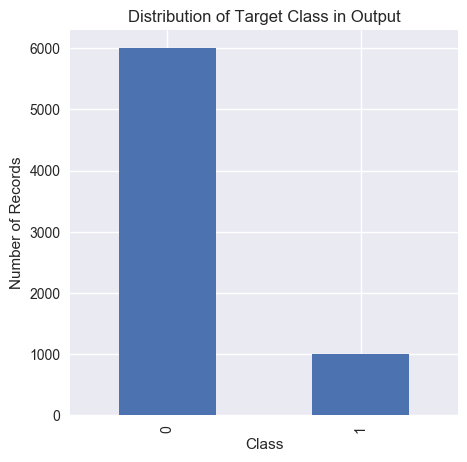

In [38]:
plt.style.use('seaborn') 
plt.figure(figsize = (5, 5))
train_labels["Volcano?"].value_counts().plot.bar()
plt.title("Distribution of Target Class in Output")
plt.ylabel("Number of Records")
plt.xlabel("Class")
plt.show()

#### Creating Dataframes

Let's combine the train and test data into a single dataframe for easier and effective analysis. We will separate the test data later.

In [7]:
df1 = train_images.join(train_labels["Volcano?"])
df1["trn_tst"] = "train"

df2 = test_images.join(test_labels["Volcano?"])
df2["trn_tst"] = "test"

df = pd.concat([df1, df2], ignore_index = True)
del(df1, df2)

df = df.rename(columns = {'Volcano?':'Volcano'})

In [8]:
print("Dimensions of Combined Data Frame:", df.shape)

Dimensions of Combined Data Frame: (9734, 12102)


#### Sample of DataFrame

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12092,12093,12094,12095,12096,12097,12098,12099,Volcano,trn_tst
0,95,101,99,103,95,86,96,89,70,104,...,92,89,103,99,117,116,118,96,1,train
1,91,92,91,89,92,93,96,101,107,104,...,93,95,98,105,104,100,90,81,0,train
2,87,70,72,74,84,78,93,104,106,106,...,95,102,94,80,91,80,84,90,0,train
3,0,0,0,0,0,0,0,0,0,0,...,89,84,80,90,92,80,88,96,0,train
4,114,118,124,119,95,118,105,116,123,112,...,102,93,109,104,106,117,111,115,0,train


---

### Corrupted Data

---

Since the data that we are dealing with is image data, there is a good chance for data corruption and possibly misclassification.

It seems (also mentioned in data dictionary) that few records are corrupted in the input data. Notice the fourth record (index = 3) in the above sample dataframe. The record seems corrupted because it is having a bunch of 0's as the pixel values.

Let's plot and see a few records and then we will build a work around to find and filter the corrupted records.

In [10]:
dfs = df.drop(columns = ["Volcano", "trn_tst"])

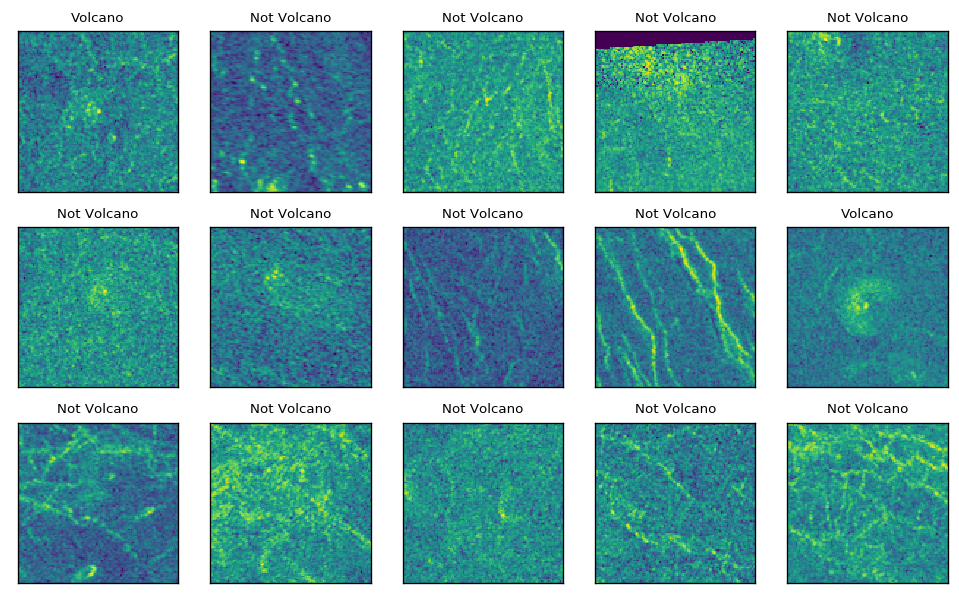

In [11]:
plt.style.use('default') 
plt.figure(figsize=(10, 6), dpi = 120)

for i in range(0, 15):
    subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(dfs.iloc[i]).reshape(110, 110))
    plt.title("Volcano" if df.iloc[i]["Volcano"] == 1 else "Not Volcano", fontsize = 8)

__Observations__:

- The fourth record has some data corrupted at the top of the image.

#### Pixel Values Distribution

Let's look at the pixel value distributions for these images.

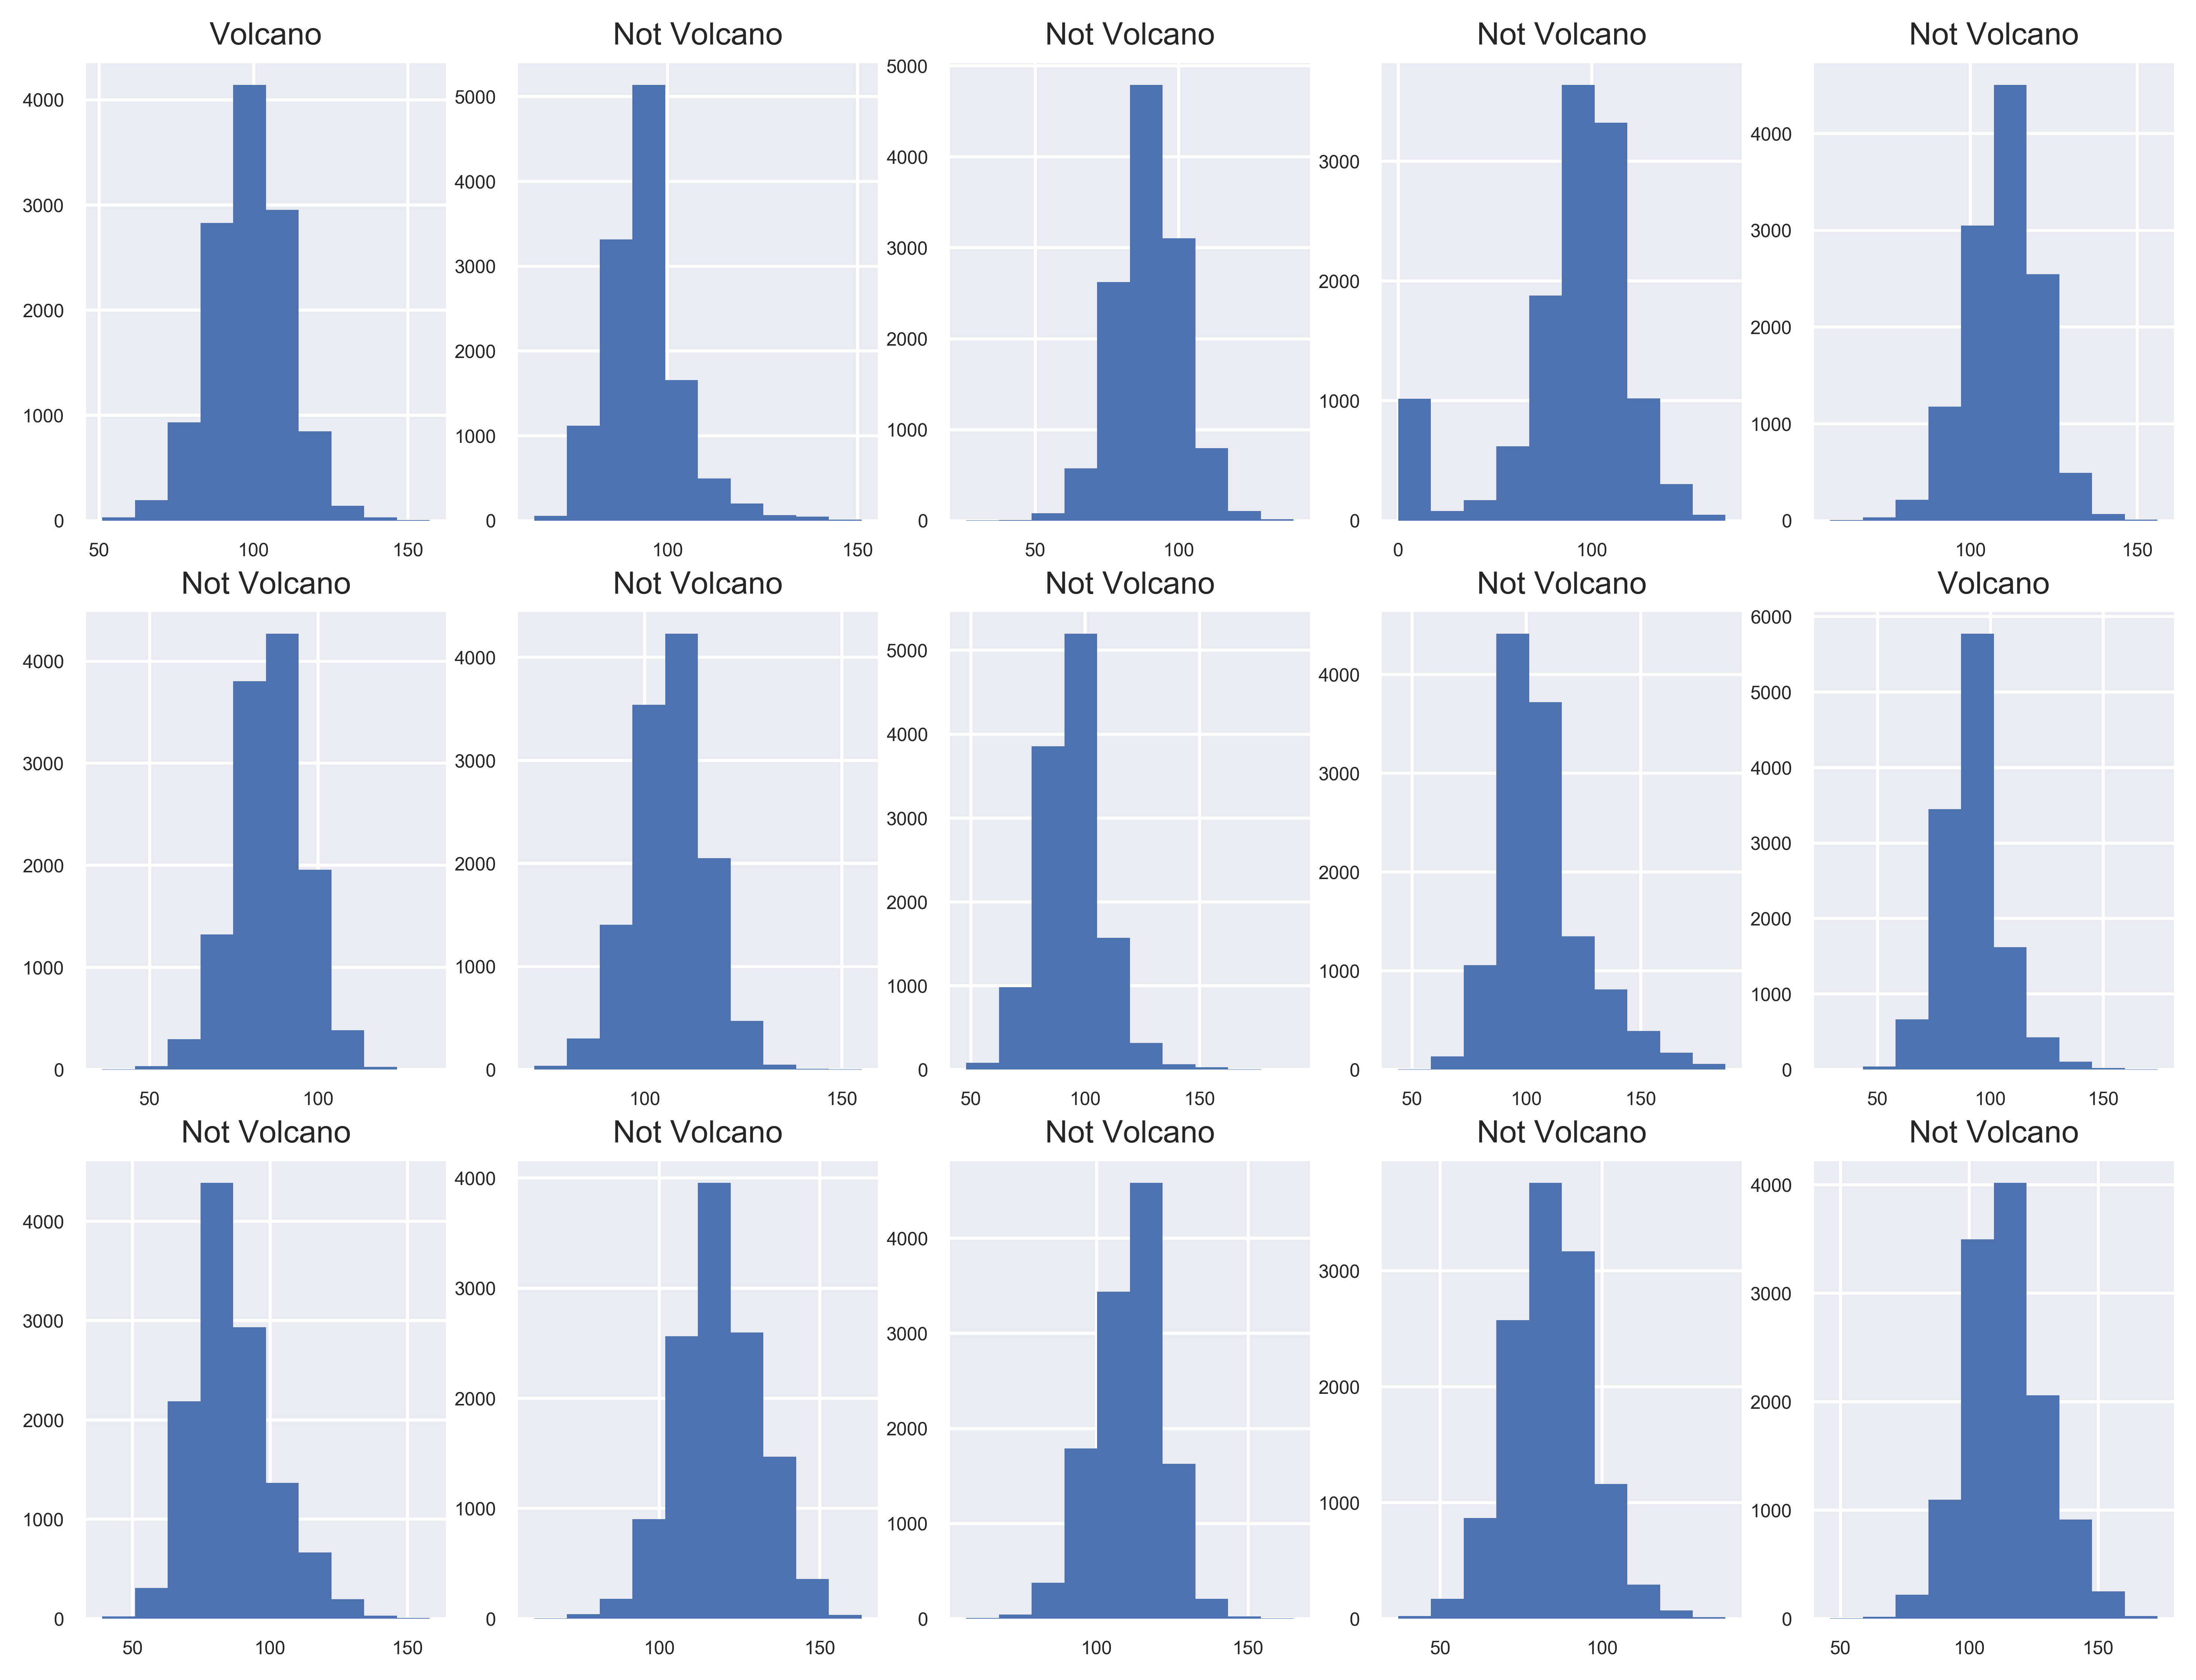

In [12]:
plt.style.use('seaborn') 
plt.figure(figsize=(12, 9), dpi = 600)

for i in range(0, 15):
    subplot(3, 5, i+1)
    plt.xticks(fontsize = 6)
    plt.yticks(fontsize = 6)
    plt.hist(np.array(dfs.iloc[i]))
    plt.title("Volcano" if df.iloc[i]["Volcano"] == 1 else "Not Volcano", fontsize = 10)

__Observations__:

- According to the histograms, for the corrupted image (fourth), the number of pixels whose value is 0 are relatively high.

#### Analyzing Dark Pixels

First, let's calculate the number of dark pixels (pixel value = 0) per image. Then we will define a threshold to find and filter corrupted records.

In [13]:
df["DarkPxls"] = sum((dfs == 0), axis = 1)

#Fetch the index of corrupted images. It is useful later.

crpt_id = df[df["DarkPxls"] != 0].index

#### Statistics and Distribution of Corrupted Pixels

In [15]:
for i, j in zip(df["DarkPxls"].loc[crpt_id].describe().index.values, df["DarkPxls"].loc[crpt_id].describe().values):
    print(str(i).upper() + " of Blank/Corrupted Pixels " + str(round(j)), "\n")

COUNT of Blank/Corrupted Pixels 378.0 

MEAN of Blank/Corrupted Pixels 8475.0 

STD of Blank/Corrupted Pixels 4369.0 

MIN of Blank/Corrupted Pixels 1.0 

25% of Blank/Corrupted Pixels 4358.0 

50% of Blank/Corrupted Pixels 12100.0 

75% of Blank/Corrupted Pixels 12100.0 

MAX of Blank/Corrupted Pixels 12100.0 



__Quartile Plot__

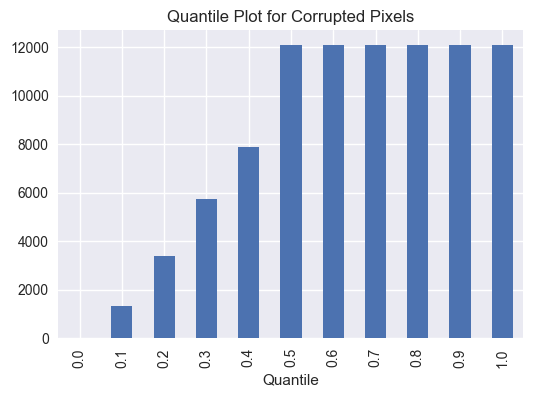

In [16]:
plt.style.use('seaborn') 
plt.figure(figsize=(6, 4))

df["DarkPxls"].loc[crpt_id].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).plot.bar()

plt.xlabel("Quantile")
plt.title("Quantile Plot for Corrupted Pixels")
plt.show()

__Observations__:

- Almost 50% of the corrupted images have all the pixels corrupted.

- 25% of the corrupted images have around 4000 pixels corrupted.

- 10% of the corrupted images have around 2000 pixels corrupted.

#### Corrupted Pixels Distribution

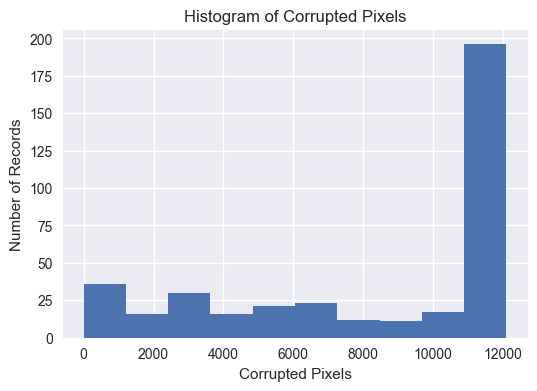

In [17]:
plt.style.use('seaborn') 
plt.figure(figsize=(6, 4))

df["DarkPxls"].loc[crpt_id].plot.hist()

plt.title("Histogram of Corrupted Pixels")
plt.xlabel("Corrupted Pixels")
plt.ylabel("Number of Records")
plt.show()

__Observations__:

- According to the histogram, most of the corrupted images have lot of corrupted pixels.

#### Target Classes in Corrupted Images

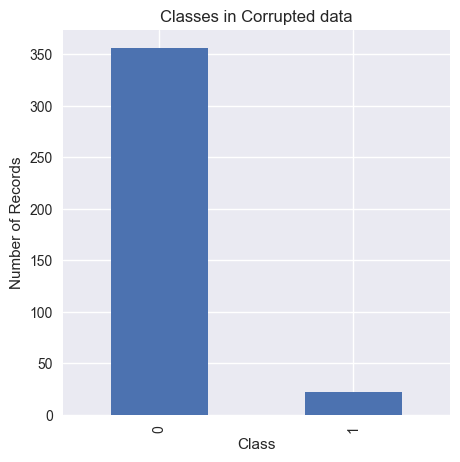

In [18]:
plt.style.use('seaborn') 
plt.figure(figsize=(5, 5))

df.loc[crpt_id]["Volcano"].value_counts().plot.bar()
plt.title("Classes in Corrupted data")
plt.ylabel("Number of Records")
plt.xlabel("Class")
plt.show()

__Observations__:

- Lot of corrupted images do not have volcanoes in them.

- Only a few corrupted records have volcanoes.

#### Corrupted Images with Volcanoes

In [19]:
vol_crpt_id = df.loc[crpt_id][df.loc[crpt_id]["Volcano"] == 1].index.values

#df.loc[vol_crpt_id].head()

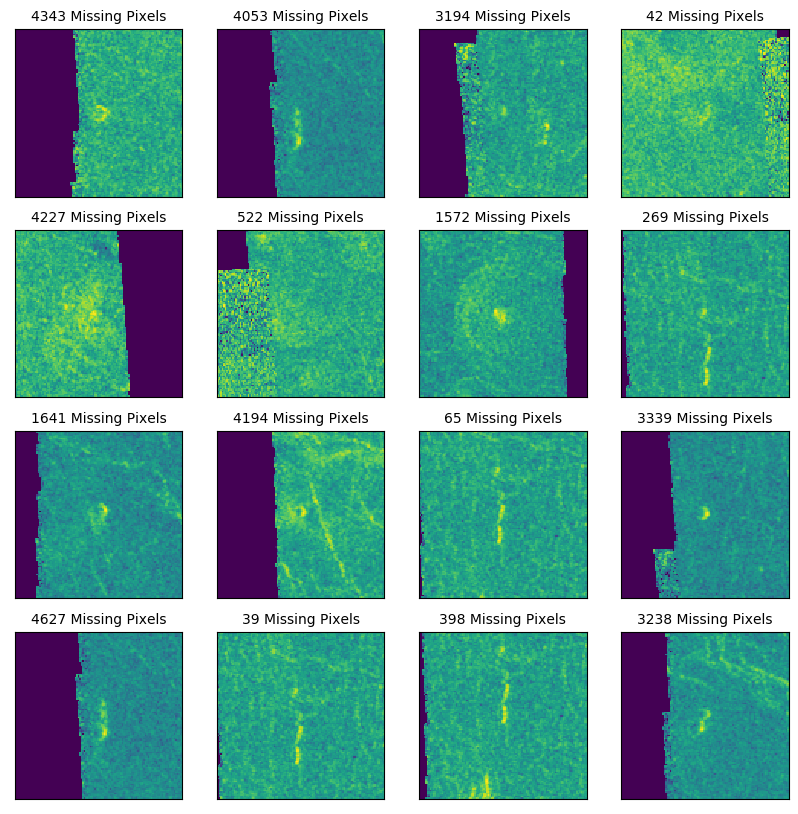

In [20]:
plt.style.use('default') 
plt.figure(figsize = (10, 10))

j = 1
for i in vol_crpt_id[0:16]:
    subplot(4, 4, j)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(dfs.loc[i]).reshape(110, 110))
    plt.title(str(df["DarkPxls"].loc[i]) + " Missing Pixels", fontsize = 10)
    j = j + 1

---

### Imputing

---

As we already have a Class Imbalance (very few images with Volcanoes) in the target variable on our original dataset, let's try not to remove the corrupted images that has volcanoes. Instead, let's fill the corrupted pixels in an image with the mean values of the corresponding image.

But, should we use Row means or Column means?: It seems, for most of the images, the entire column is corrupted. So, let's use row means of image to replace the corrupted pixel.

In [21]:
vol_crpt_imgs = np.array(dfs.loc[vol_crpt_id]).reshape(22, 110, 110)

for i in range(vol_crpt_imgs.shape[0]):
    vol_crpt_imgs[i] = np.array(pd.DataFrame(vol_crpt_imgs[i]).T.replace(0, pd.DataFrame(vol_crpt_imgs[i]).mean(axis = 1).apply(int)).T)

#### Imputing Corrupted Pixels with Row Means

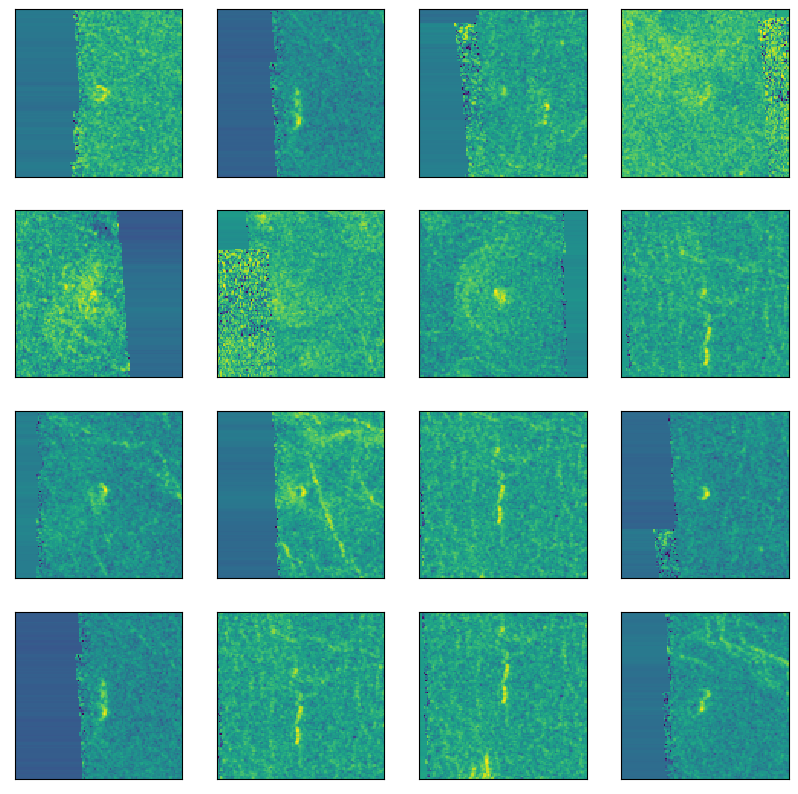

In [22]:
plt.style.use('default') 
plt.figure(figsize = (10, 10))

for i in range(vol_crpt_imgs.shape[0]-6):
    subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(vol_crpt_imgs[i])

The images doesn't look good. Row means doesn't seem like a great idea.

Instead let's compute the mean of every pixel for all the images that are not corrupted and use those means to replace the corrupted pixels in corrupted images.

In [23]:
dfs = pd.concat([dfs, pd.DataFrame(dfs[df["DarkPxls"] == 0].mean().apply(int)).T], ignore_index = True)

dfs.loc[vol_crpt_id] = dfs.loc[vol_crpt_id].replace(0, dfs.loc[9734])

dfs.drop(index = 9734, inplace = True)

#### Imputing Corrupted Pixels with Pixel Means from all images

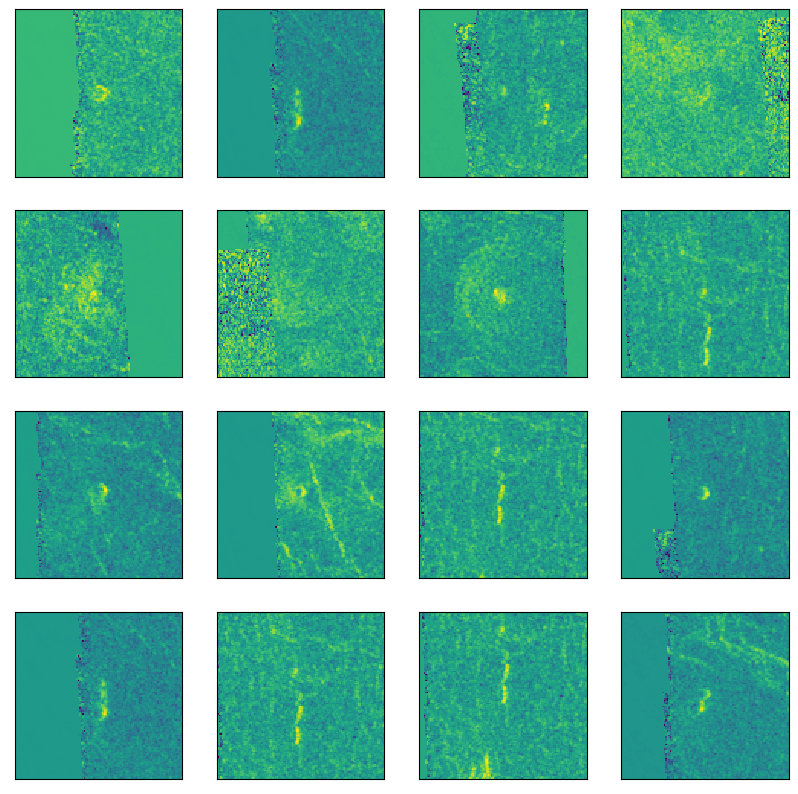

In [24]:
plt.style.use('default') 
plt.figure(figsize = (10, 10))

j = 1
for i in vol_crpt_id[0:16]:
    subplot(4, 4, j)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(dfs.loc[i]).reshape(110, 110))
    j = j + 1

Definitely not a wonderful improvement, but much better than using row means. Let's stick with these pixel values for corrupted images.

---

#### Corrupted Images without Volcanoes

In [25]:
novol_crpt_id = df.loc[crpt_id][df.loc[crpt_id]["Volcano"] == 0].index.values

#df.loc[novol_crpt_id].head()

Let's plot a few records whose corrupted pixels are within 0.1 Quantile

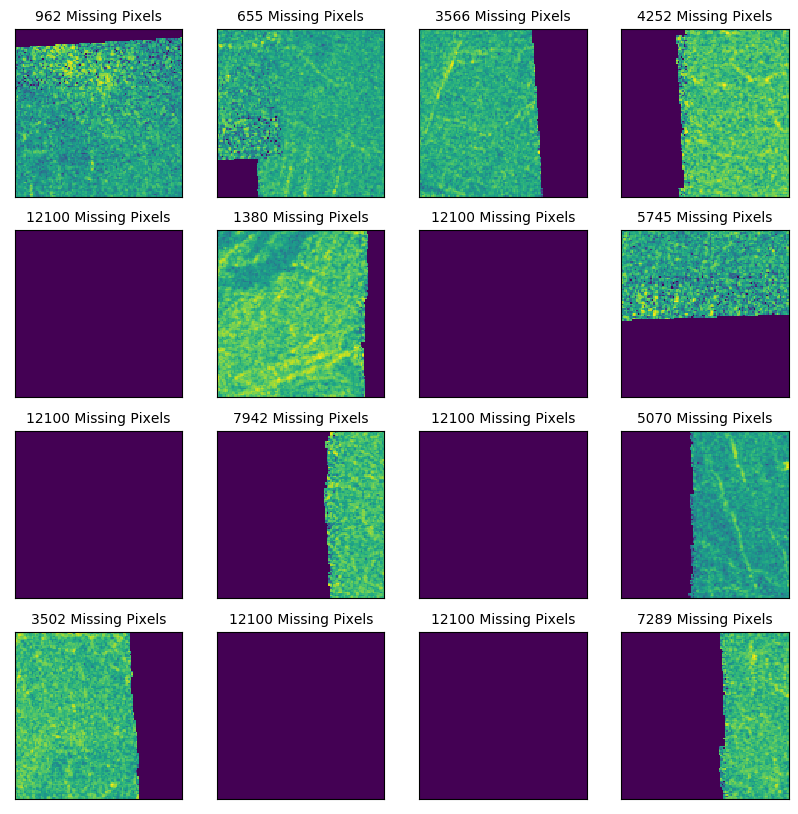

In [26]:
plt.style.use('default') 
plt.figure(figsize = (10, 10))

j = 1
for i in novol_crpt_id[0:16]:
    subplot(4, 4, j)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(dfs.loc[i]).reshape(110, 110))
    plt.title(str(df["DarkPxls"].loc[i]) + " Missing Pixels", fontsize = 10)
    j = j + 1

As our dataset already have a good number of examples without volcanoes, I think it would not be good idea to invest time to define threshold level for missing pixels or to impute data for corrupted pixels.

Let's omit the corrupted records from the dataset.

#### Omitting Corrupted Records with no Volcanoes

In [27]:
dfs.drop(novol_crpt_id, inplace = True)

print("Shape of New Data Frame:", dfs.shape)

#final_df = dfs.join(df.loc[dfs.index][["Volcano", "trn_tst"]])
#final_df.to_csv("venusvolcanoes.csv", index = False)

Shape of New Data Frame: (9378, 12100)


In [28]:
dfs.head()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,95,101,99,103,95,86,96,89,70,104,...,111,107,92,89,103,99,117,116,118,96
1,91,92,91,89,92,93,96,101,107,104,...,103,92,93,95,98,105,104,100,90,81
2,87,70,72,74,84,78,93,104,106,106,...,84,71,95,102,94,80,91,80,84,90
4,114,118,124,119,95,118,105,116,123,112,...,116,113,102,93,109,104,106,117,111,115
5,79,95,90,82,73,74,77,75,82,87,...,90,80,79,78,65,71,62,97,89,73


- Corrupted Records Omitted!